In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from collections import namedtuple
import warnings
import matplotlib as mpl
import numpy as np

In [2]:
mpl.rcParams["figure.figsize"] = (12,6)

# Consumo Cerveja - São Paulo

Os dados (amostra) foram coletados em São Paulo, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média).

O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Alvo, durante o período de um ano.

Atributos:

    - Data: Dia da Coleta
    - Temperatura Media (C): Temperatura Média do Dia em Celsius
    - Temperatura Minima (C): Temperatura Mínima do Dia em Celsius
    - Temperatura Maxima (C): Temperatura Máxima do Dia em Celsius
    - Precipitacao (mm): Precipitação do Dia em Milímetros
    - Final de Semana: Identificação se é fim de semana ou não
    - Consumo de cerveja (litros): Quantidade de cerveja em livros


Fonte: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

## Carregamento de Dados

In [3]:
df = pd.read_csv('data/consumo_cerveja.csv')

In [4]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [5]:
df.shape[0]

941

## Limpeza Dados

Objetivo: Tratar os dados de forma que consigamos usá-los para algoritmo de ML

Possíveis técnicas:
 - Remoção de Dados Inválidos
 - Remoção de Outliers (Valores muito fora do esperado para o conjunto. Normalmente são erros de coleta)
 - Imputação de Valores em Campos Nulos
 - Transformação de tipos de variáveis

### Visualização Básica

#### Quantidade de Linhas e Colunas

In [6]:
linhas, colunas = df.shape

print("O Dataset possui {} linhas e {} colunas".format(linhas, colunas))

O Dataset possui 941 linhas e 7 colunas


#### Informações Básicas

Aqui é possivel visualizar as colunas, os tipos de dados, e se o dataset possui valores nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### Renomear Colunas

Para fins de facilidade de uso, deixamos tudo em _snake_case_, padrão do Python

In [8]:
# Colunas Existentes
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [9]:
df = df.rename(columns={
    "Data": "data",
    "Temperatura Media (C)": "temperatura_media_c",
    "Temperatura Minima (C)": "temperatura_minima_c",
    "Temperatura Maxima (C)": "temperatura_maxima_c",
    "Precipitacao (mm)": "precipitacacao_mm",
    "Final de Semana": "final_de_semana",
    "Consumo de cerveja (litros)": "consumo_cerveja_litros",
})

In [10]:
# Colunas Renomeadas
df.columns

Index(['data', 'temperatura_media_c', 'temperatura_minima_c',
       'temperatura_maxima_c', 'precipitacacao_mm', 'final_de_semana',
       'consumo_cerveja_litros'],
      dtype='object')

In [11]:
df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### Tratar Dados Nulos

#### Inspecionar Dados Nulos

In [12]:
# Mostrar dados Nulos
df[df.isna().any(axis=1)]

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remover dados nulos

In [13]:
# Remover dados nulos
df = df[df.notna().any(axis=1)]

In [14]:
# Mostrar dados nulos
df[df.isna().any(axis=1)]

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros


#### Informações Básicas do Dataset após a Remoção de Dados Nulos

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data                    365 non-null    object 
 1   temperatura_media_c     365 non-null    object 
 2   temperatura_minima_c    365 non-null    object 
 3   temperatura_maxima_c    365 non-null    object 
 4   precipitacacao_mm       365 non-null    object 
 5   final_de_semana         365 non-null    float64
 6   consumo_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


### Tratar Tipos de Variáveis

#### Mostrar tipos existentes

In [16]:
df.dtypes

data                       object
temperatura_media_c        object
temperatura_minima_c       object
temperatura_maxima_c       object
precipitacacao_mm          object
final_de_semana           float64
consumo_cerveja_litros    float64
dtype: object

In [17]:
df.sample(5)

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
219,2015-08-08,"21,16",16,"27,8",0,1.0,31.310
102,2015-04-13,"20,88","18,1","25,7",0,0.0,22.620
18,2015-01-19,"28,22","22,7","36,5","3,7",0.0,29.265
156,2015-06-06,"19,66","13,8","26,1",0,1.0,31.129
318,2015-11-15,"23,06","19,8","29,7",8,1.0,29.386


#### Converter Strings para Float

In [18]:
def substituir_virgula_por_ponto(x):
    return x.replace(',', '.')

df['temperatura_media_c'] = df['temperatura_media_c'].apply(substituir_virgula_por_ponto)
df['temperatura_minima_c'] = df['temperatura_minima_c'].apply(substituir_virgula_por_ponto)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].apply(substituir_virgula_por_ponto)
df['precipitacacao_mm'] = df['precipitacacao_mm'].apply(substituir_virgula_por_ponto)

df['temperatura_media_c'] = df['temperatura_media_c'].astype(float)
df['temperatura_minima_c'] = df['temperatura_minima_c'].astype(float)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].astype(float)
df['precipitacacao_mm'] = df['precipitacacao_mm'].astype(float)

In [19]:
df.dtypes

data                       object
temperatura_media_c       float64
temperatura_minima_c      float64
temperatura_maxima_c      float64
precipitacacao_mm         float64
final_de_semana           float64
consumo_cerveja_litros    float64
dtype: object

In [20]:
df.sample(5)

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
334,2015-12-01,20.10,16.4,25.8,0.0,0.0,24.529
335,2015-12-02,22.10,18.2,29.4,0.0,0.0,30.471
107,2015-04-18,23.36,18.2,29.3,0.0,1.0,33.822
96,2015-04-07,17.38,16.1,20.0,7.1,0.0,21.004
65,2015-03-07,21.92,19.4,26.6,38.2,1.0,29.090


## Visualização de Varáveis

### Temperatura Média

#### Estatística Descritiva

In [21]:
df["temperatura_media_c"].describe()

count    365.000000
mean      21.226356
std        3.180108
min       12.900000
25%       19.020000
50%       21.380000
75%       23.280000
max       28.860000
Name: temperatura_media_c, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Temperatura Média')

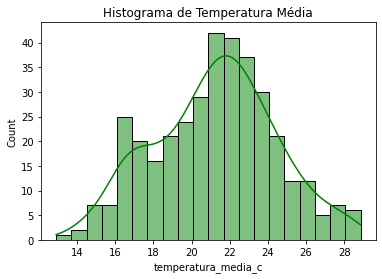

In [22]:
ax = sns.histplot(data=df, x="temperatura_media_c", kde=True, bins=20, color="green")

ax.set_title("Histograma de Temperatura Média")

#### Temperatura Média Ambiente vs Consumo de Cerveja

Text(0.5, 1.0, 'Temperatura Média Ambiente vs Consumo de Cerveja')

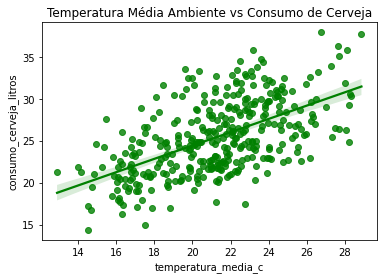

In [24]:
ax = sns.regplot(data=df, x='temperatura_media_c', y='consumo_cerveja_litros', color="green")

ax.set_title("Temperatura Média Ambiente vs Consumo de Cerveja")

### Temperatura Mínima

#### Estatística Descritiva

In [25]:
df["temperatura_minima_c"].describe()

count    365.000000
mean      17.461370
std        2.826185
min       10.600000
25%       15.300000
50%       17.900000
75%       19.600000
max       24.500000
Name: temperatura_minima_c, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Temperatura Mínima')

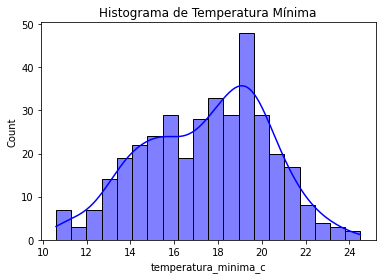

In [26]:
ax = sns.histplot(data=df, x="temperatura_minima_c", kde=True, bins=20, color="blue")

ax.set_title("Histograma de Temperatura Mínima")

#### Temperatura Média Ambiente vs Consumo de Cerveja

Text(0.5, 1.0, 'Temperatura Mínima Ambiente vs Consumo de Cerveja')

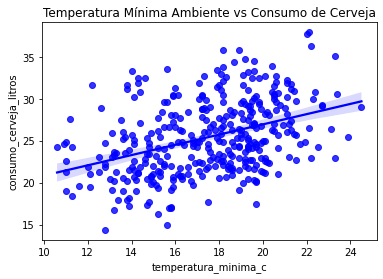

In [27]:
ax = sns.regplot(data=df, x='temperatura_minima_c', y='consumo_cerveja_litros', color="blue")

ax.set_title("Temperatura Mínima Ambiente vs Consumo de Cerveja")

### Temperatura Máxima

#### Estatística Descritiva

In [28]:
df["temperatura_maxima_c"].describe()

count    365.000000
mean      26.611507
std        4.317366
min       14.500000
25%       23.800000
50%       26.900000
75%       29.400000
max       36.500000
Name: temperatura_maxima_c, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Temperatura Máxima')

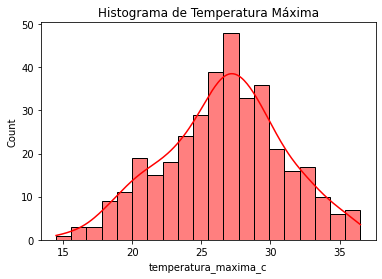

In [29]:
ax = sns.histplot(data=df, x="temperatura_maxima_c", kde=True, bins=20, color="red")

ax.set_title("Histograma de Temperatura Máxima")

#### Temperatura Máxima Ambiente vs Consumo de Cerveja

Text(0.5, 1.0, 'Temperatura Máxima Ambiente vs Consumo de Cerveja')

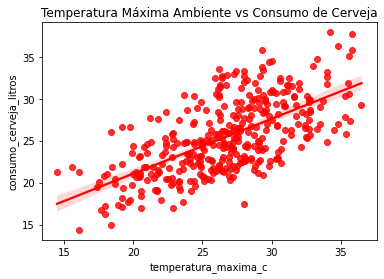

In [30]:
ax = sns.regplot(data=df, x='temperatura_maxima_c', y='consumo_cerveja_litros', color="red")

ax.set_title("Temperatura Máxima Ambiente vs Consumo de Cerveja")

### Precipitação (Chuva)

#### Estatística Descritiva

In [32]:
df["precipitacacao_mm"].describe()

count    365.000000
mean       5.196712
std       12.417844
min        0.000000
25%        0.000000
50%        0.000000
75%        3.200000
max       94.800000
Name: precipitacacao_mm, dtype: float64

#### Histograma

Text(0.5, 1.0, 'Histograma de Precipitação')

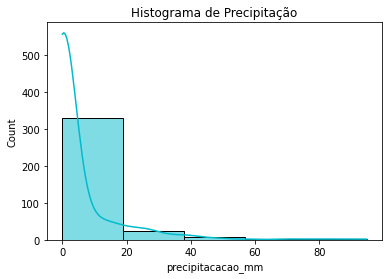

In [36]:
ax = sns.histplot(data=df, x="precipitacacao_mm", kde=True, bins=5, color="#0bc")

ax.set_title("Histograma de Precipitação")

#### Precipitação vs Consumo de Cerveja

Text(0.5, 1.0, 'Precipitação (mm) vs Consumo de Cerveja')

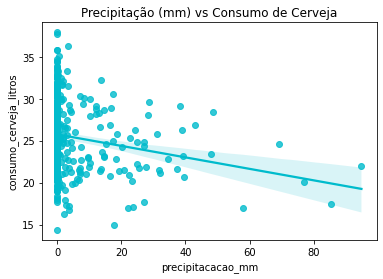

In [37]:
ax = sns.regplot(data=df, x='precipitacacao_mm', y='consumo_cerveja_litros', color="#0bc")

ax.set_title("Precipitação (mm) vs Consumo de Cerveja")

### Fim de Semana

#### Estatística Descritiva

In [38]:
df["final_de_semana"].describe()

count    365.000000
mean       0.284932
std        0.452001
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: final_de_semana, dtype: float64

#### Fim de Semana vs Consumo de Cerveja

Text(0.5, 1.0, 'Fim de Semana vs Consumo de Cerveja')

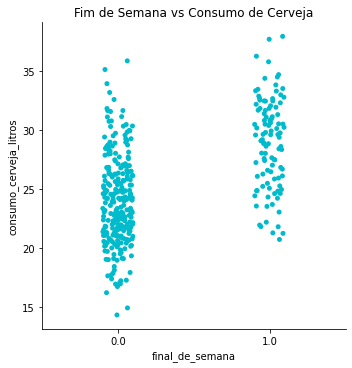

In [39]:
g = sns.catplot(data=df, x='final_de_semana', y='consumo_cerveja_litros', color="#0bc")

axes = g.axes.flatten()
axes[0].set_title("Fim de Semana vs Consumo de Cerveja")

##### Consumo Diário em Dia de Semana e Dia de Fim de Semana

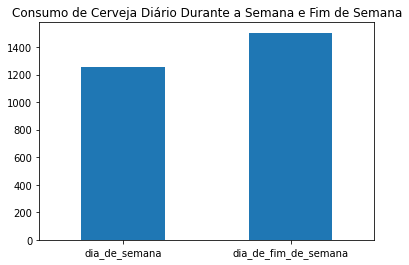

In [40]:
consumo_por_dia = {
    'dia_de_semana': df[df['final_de_semana'] == 0]['consumo_cerveja_litros'].sum()/5,
    'dia_de_fim_de_semana': df[df['final_de_semana'] == 1]['consumo_cerveja_litros'].sum()/2,
}

ax = pd.Series(consumo_por_dia).plot.bar()


ax.set_title("Consumo de Cerveja Diário Durante a Semana e Fim de Semana")
ax.set_xticklabels(labels=consumo_por_dia.keys(),rotation=0);

## Machine Learning

### Visualização dos Dados

In [41]:
df.sample(10)

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
65,2015-03-07,21.92,19.4,26.6,38.2,1.0,29.090
334,2015-12-01,20.10,16.4,25.8,0.0,0.0,24.529
283,2015-10-11,22.48,19.6,30.0,0.0,1.0,34.496
142,2015-05-23,19.94,15.9,24.4,0.0,1.0,27.250
236,2015-08-25,16.98,14.3,20.5,2.4,0.0,21.092
70,2015-03-12,22.26,19.2,26.9,1.2,0.0,22.409
95,2015-04-06,21.36,18.5,27.7,0.0,0.0,22.356
335,2015-12-02,22.10,18.2,29.4,0.0,0.0,30.471
156,2015-06-06,19.66,13.8,26.1,0.0,1.0,31.129
262,2015-09-20,23.60,19.2,33.3,0.0,1.0,34.695


### Separação Conjunto Treinamento e Teste

- Treino: Utilizado no treinamento do modelo de Machine Learning
- Teste: Utilizado para verificar se o modelo generaliza o que aprendeu para exemplos não vistos no treinamento

#### Separar X e y

- X: Contém os atributos que serão utilizados para treinar/testar o modelo de ML
- y: Contém a variável alvo, que desejamos prever

Não utilizaremos a data no treinamento pois, um atributo temporal transformaria num problema de Série Temporal em vez de Regressão simples

In [43]:
X = df.drop(['data', 'consumo_cerveja_litros'], axis=1)
X.sample(5)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
137,18.60,16.6,21.3,0.0,0.0
268,20.58,18.2,24.9,28.6,1.0
112,21.20,18.6,24.9,14.6,0.0
296,17.94,16.2,21.2,0.0,1.0
0,27.30,23.9,32.5,0.0,0.0


In [44]:
y = df['consumo_cerveja_litros']
y.sample(5)

184    24.632
82     21.617
95     22.356
171    28.857
192    33.298
Name: consumo_cerveja_litros, dtype: float64

#### Separar Conjuntos de Treino e de Teste
- Treino: 70%
- Teste: 30%

In [45]:
# Separação de Conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Quantidade de elementos em cada conjunto
quantidade_conjunto_treino = X_train.shape[0]
quantidade_conjunto_teste = X_test.shape[0]

print("O conjunto de Treino ficou com {} elementos, e o conjunto de Teste ficou com {} elementos".format(quantidade_conjunto_treino, quantidade_conjunto_teste))

O conjunto de Treino ficou com 255 elementos, e o conjunto de Teste ficou com 110 elementos


### Pré-Processamento

#### Normalização

A Normalização é um processo que busca tratar os dados para facilitar o processamento por algoritmos de ML e eliminar o efeito de diferentes grandezas entre as variáveis.

Existem várias ténicas de normalização, porém, no nosso caso utilizaremos o Standardization.


Standardization Formula:

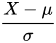

##### Dados antes da normalização

In [50]:
X_train.sample(5)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
298,20.86,16.0,28.5,28.4,0.0
141,20.26,16.3,25.4,0.0,0.0
217,21.06,16.3,27.7,0.0,0.0
181,17.78,16.2,20.5,0.0,0.0
105,21.26,18.6,26.7,25.4,0.0


##### Visualização da variável Temperatura Média Antes da Normalização

In [59]:
X_train["temperatura_media_c"].describe()

count    255.000000
mean      21.041725
std        3.191729
min       12.900000
25%       18.650000
50%       21.220000
75%       23.150000
max       28.300000
Name: temperatura_media_c, dtype: float64

Text(0.5, 1.0, 'Histograma de Temperatura Média')

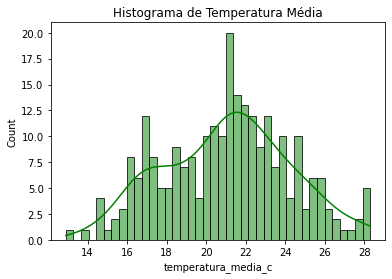

In [57]:
ax = sns.histplot(data=X_train, x="temperatura_media_c", kde=True, bins=40, color="green")

ax.set_title("Histograma de Temperatura Média")

##### A Normalização em si

In [52]:
# Inicializar o Normalizador
scaler = StandardScaler()

In [53]:
# Treinar o Normalizador
scaler.fit(X_train)

StandardScaler()

In [54]:
# Gerar um X_train normalizado
X_train_scaled = scaler.transform(X_train)

In [55]:
# Criar um dataframe X_train_scaled
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# Mostrar o X_train normalizado
X_train_scaled.sample(5)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
128,1.261441,0.772585,0.925388,1.000763,1.692228
209,0.859615,1.222931,1.250357,-0.420934,-0.590937
217,0.037129,0.737943,-0.351276,-0.420934,-0.590937
241,-1.494829,-0.717022,-1.952909,-0.230218,-0.590937
142,1.154706,1.119005,1.180721,-0.126192,-0.590937


##### Visualização da variável Temperatura Média Após a Normalização

In [60]:
X_train_scaled["temperatura_media_c"].describe()

count    2.550000e+02
mean    -9.404242e-17
std      1.001967e+00
min     -2.555899e+00
25%     -7.508247e-01
50%      5.596500e-02
75%      6.618421e-01
max      2.278561e+00
Name: temperatura_media_c, dtype: float64

Text(0.5, 1.0, 'Histograma de Temperatura Média')

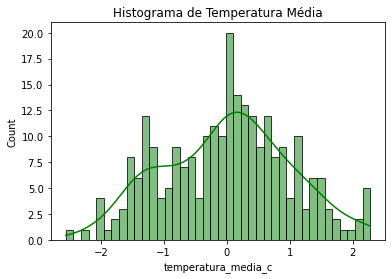

In [56]:
ax = sns.histplot(data=X_train_scaled, x="temperatura_media_c", kde=True, bins=40, color="green")

ax.set_title("Histograma de Temperatura Média")

### Aprendizado

Treinamento do modelo utilizando Regressão Linear no conjunto de dados de Treino

In [62]:
# Inicialização da Regressão Linear
reg = LinearRegression()

In [63]:
# Modelagem
reg.fit(X_train_scaled, y_train)

LinearRegression()

#### Visualização do Modelo Treinado

##### Função Preditora

In [64]:
# Variável Independente
interceptador = reg.intercept_

# Coeficientes
coeficientes = reg.coef_

funcao = "predição = {:.2f} + ({:.2f} * temperatura_media_c) + ({:.2f} * temperatura_minima_c) + ({:.2f} * temperatura_maxima_c) + ({:.2f} * precipitacacao_mm) + ({:.2f} * final_de_semana)".format(interceptador, *coeficientes)
print(funcao)

predição = 25.15 + (0.73 * temperatura_media_c) + (-0.30 * temperatura_minima_c) + (2.41 * temperatura_maxima_c) + (-0.62 * precipitacacao_mm) + (2.34 * final_de_semana)


In [66]:
# Nosso predict home-made
def predict(X_sample):
    # Variável Independente
    interceptador = reg.intercept_
    
    # Coeficientes
    coeficientes = reg.coef_
    
    return interceptador + (reg.coef_ * X_sample).sum()

In [70]:
# Index
index = 0

# Predição com nossa função home-made
resultado_predito = predict(X_train_scaled.iloc[index])

# Resultado Real
resultado_real = y_train.iloc[index]

# Diferença
diferenca_entre_predito_e_real = np.abs(resultado_predito - resultado_real)

print("O resultado predito foi {:.2f} e o real é {:.2f}".format(resultado_predito, resultado_real))
print("A diferença absoluta entre os dois é {:.2f} litros".format(diferenca_entre_predito_e_real))

O resultado predito foi 26.79 e o real é 29.64
A diferença absoluta entre os dois é 2.85 litros


#### Predição do Conjunto de Treinamento

Aqui vamos verificar a performance do modelo treinado no conjunto de Treinamento

In [71]:
# Predizer o resultado
y_pred = reg.predict(X_train_scaled)

In [72]:
# Resultado predito
y_pred[0:10]

array([26.78695182, 19.37257857, 29.29456141, 30.01731241, 21.61826341,
       27.79126138, 21.03103851, 30.54124469, 29.31957295, 24.6571068 ])

In [73]:
# Resultado real
y_train[0:10].values

array([29.637, 17.655, 30.498, 35.127, 24.683, 28.631, 23.243, 29.265,
       33.182, 23.469])

##### Métrica

Existem várias métricas de análise de erro para regressão.

Para esta apresentação, utilizaremos o Mean Absolute Error:

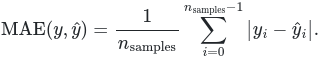




Referência: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

In [74]:
## Performance no Conjunto de Treinamento
mean_absolute_error(y_train, y_pred)

1.9487853270878723

##### Visualização do Erro

In [75]:
series = {
    'y_true': y_train,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_absolute_error([x['y_true']], [x['y_pred']])


series_df['mae'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

,y_true,y_pred,mae
268,29.637,26.786952,2.850048
231,17.655,19.372579,1.717579
157,30.498,29.294561,1.203439
19,35.127,30.017312,5.109688
147,24.683,21.618263,3.064737


Text(0.5, 1.0, 'Visualização do Erro no Conjunto de Treinamento')

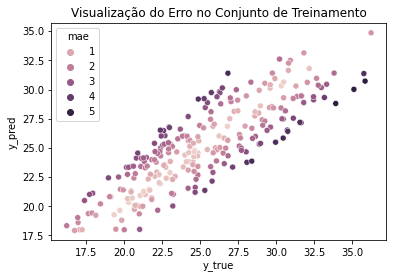

In [76]:
ax = sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="mae")

ax.set_title("Visualização do Erro no Conjunto de Treinamento")

#### Predição do Conjunto de Teste

Aqui vamos verificar a performance do modelo treinado no conjunto de Teste

In [77]:
# Aplicar a transformação no conjunto de teste
X_test_scaled = scaler.transform(X_test)

# Criar um dataframe X_test_scaled
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [78]:
X_test_scaled.sample(5)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
105,-0.057048,-0.717022,-0.003095,-0.420934,-0.590937
47,0.960072,0.668659,0.902176,2.561161,-0.590937
50,-0.929762,-1.098084,-0.049519,-0.420934,1.692228
33,0.847058,0.876511,1.134297,-0.308238,1.692228
94,-1.475994,-0.890232,-1.744001,-0.178205,-0.590937


In [79]:
# Predizer o resultado
y_pred = reg.predict(X_test_scaled)

In [80]:
# Resultado predito
y_pred[0:10]

array([25.60041023, 26.97117725, 28.15676471, 21.63976738, 27.27893434,
       17.9680884 , 22.52646043, 18.88477877, 18.11467917, 20.80744662])

In [81]:
# Resultado real
y_test[0:10].values

array([25.64 , 31.655, 29.938, 20.575, 26.241, 14.94 , 20.167, 20.452,
       20.106, 19.143])

##### Métrica

Existem várias métricas de análise de erro para regressão.

Para esta apresentação, utilizaremos o Mean Absolute Error:

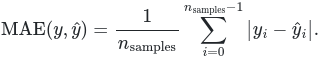




Referência: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

In [82]:
## Performance no Conjunto de Treinamento
mean_absolute_error(y_test, y_pred)

2.0111941277957928

##### Visualização do Erro

In [83]:
series = {
    'y_true': y_test,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_absolute_error([x['y_true']], [x['y_pred']])


series_df['mae'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

,y_true,y_pred,mae
193,25.640,25.600410,0.039590
33,31.655,26.971177,4.683823
15,29.938,28.156765,1.781235
309,20.575,21.639767,1.064767
57,26.241,27.278934,1.037934


Text(0.5, 1.0, 'Visualização do Erro no Conjunto de Teste')

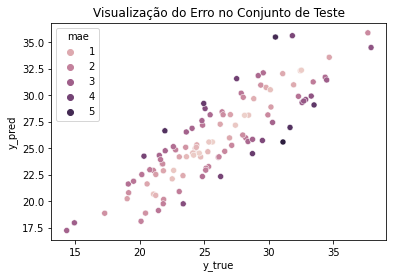

In [84]:
ax = sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="mae")

ax.set_title("Visualização do Erro no Conjunto de Teste")

#### Teste Aleatório

In [85]:
def predict_test(index):
    
    X_exemplo = pd.DataFrame(X_test.iloc[index]).T
    
    print("Exemplo:")
    print(X_exemplo.iloc[0])
    
    y_true_exemplo = y_test.iloc[index]
    
    Resultado = namedtuple('Resultado', ['y_true', 'y_pred'])
        
    X_exemplo_scaled = pd.DataFrame(scaler.transform(X_exemplo), columns=X.columns)
    
    y_pred_exemplo = reg.predict(X_exemplo_scaled)[0]
    
    print("\n" + str(Resultado(y_true_exemplo, round(y_pred_exemplo,3))))

In [90]:
predict_test(9)

Exemplo:
temperatura_media_c     17.8
temperatura_minima_c    15.8
temperatura_maxima_c    21.7
precipitacacao_mm        0.0
final_de_semana          0.0
Name: 126, dtype: float64

Resultado(y_true=19.143, y_pred=20.807)
